<a href="https://colab.research.google.com/github/Khasimbabu/DataScience_Projects/blob/main/SentimentAnalysis_IMDBReviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sentiment Analysis of IMDB reviews

## Importing the data

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('IMDB Dataset.csv')
df.head()
df = df.sample(5000)
#df = df.iloc[0:5000,:]

In [ ]:
# Review Frquency Count
vc_df = pd.DataFrame(df['sentiment'].value_counts()).reset_index()
vc_df.columns = ['Sentiment', 'Count'] 
vc_df['Sentiment'] = vc_df['Sentiment'].map({1 : 'positive', 0: 'negative'}) 
vc_df

,Sentiment,Count
0,NaN,2527
1,NaN,2473


## Pre-processing the data

### Some common Problems:


1.   Remove Punctuation
2.   Replace short words
3.   Making text lower case
4.   Remove stopwords
5.   Lemmatization



#### Removing punctuation (.!<>{}’,”(/)-\)

In [ ]:
df['review']

2815     The movie uses motifs that could be plagiarize...
31487    Take:<br /><br />1. a famous play<br /><br />2...
12010    When the British Film Institute asked Martin S...
9509     I do find it a bit overrated. Maybe it's just ...
21191    I first saw this movie in the mid 80's and tho...
                               ...                        
19596    I just got the UK 4-disc special edition of Su...
41708    I'll start by confessing that I tend to really...
8544     I have to say that this is one of the best mov...
17715    I don't know where to begin. Perhaps the whole...
8113     What starts out as an interesting story quickl...
Name: review, Length: 5000, dtype: object

In [ ]:
# Replacing punctuations with space
df['review_processed'] = df['review'].str.replace("[^a-zA-Z]", " ") 


# Re ordering columns
df = df[['review','review_processed','sentiment']]

In [ ]:
df['review_processed']

2815     The movie uses motifs that could be plagiarize...
31487    Take  br    br      a famous play br    br    ...
12010    When the British Film Institute asked Martin S...
9509     I do find it a bit overrated  Maybe it s just ...
21191    I first saw this movie in the mid    s and tho...
                               ...                        
19596    I just got the UK   disc special edition of Su...
41708    I ll start by confessing that I tend to really...
8544     I have to say that this is one of the best mov...
17715    I don t know where to begin  Perhaps the whole...
8113     What starts out as an interesting story quickl...
Name: review_processed, Length: 5000, dtype: object

#### Replacing short words

In [ ]:
'-'.join(["this", "batch" , "is", "awesome"])

'this-batch-is-awesome'

In [ ]:
df['review_processed'] = df['review_processed'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>2]))

In [ ]:
df['review_processed']

2815     The movie uses motifs that could plagiarized f...
31487    Take famous play director with now ideas his o...
12010    When the British Film Institute asked Martin S...
9509     find bit overrated Maybe just because never se...
21191    first saw this movie the mid and thought was f...
                               ...                        
19596    just got the disc special edition Superman for...
41708    start confessing that tend really enjoy action...
8544     have say that this one the best movies have ev...
17715    don know where begin Perhaps the whole idea th...
8113     What starts out interesting story quickly disi...
Name: review_processed, Length: 5000, dtype: object

#### LowerCase character

In [ ]:
word = "Kousik"
word.lower()

'kousik'

In [ ]:
# make entire text lowercase
df['review_processed'] = [review.lower() for review in df['review_processed']]

In [ ]:
df['review_processed']

2815     the movie uses motifs that could plagiarized f...
31487    take famous play director with now ideas his o...
12010    when the british film institute asked martin s...
9509     find bit overrated maybe just because never se...
21191    first saw this movie the mid and thought was f...
                               ...                        
19596    just got the disc special edition superman for...
41708    start confessing that tend really enjoy action...
8544     have say that this one the best movies have ev...
17715    don know where begin perhaps the whole idea th...
8113     what starts out interesting story quickly disi...
Name: review_processed, Length: 5000, dtype: object

#### Remove stop words

In [ ]:
# Removing Stopwords Begin
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = stopwords.words('english')


# Making custom list of words to be removed 
add_words = ['movie','film','one','make','even']

# Adding to the list of words
stop_words.extend(add_words)

# Function to remove stop words 
def remove_stopwords(rev):
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

# Removing stopwords
df['review_processed'] = [remove_stopwords(r) for r in df['review_processed']]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
df['review_processed']

2815     uses motifs could plagiarized wait dark much b...
31487    take famous play director ideas using copy sta...
12010    british institute asked martin scorcese create...
9509     find bit overrated maybe never seen subtitled ...
21191    first saw mid thought funny gotten older watch...
                               ...                        
19596    got disc special edition superman additional s...
41708    start confessing tend really enjoy action movi...
8544     say best movies ever seen bored looked found h...
17715    know begin perhaps whole idea disaster waiting...
8113     starts interesting story quickly disintegrates...
Name: review_processed, Length: 5000, dtype: object

#### Lemmatization

In [ ]:
# Begin Lemmatization 
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('averaged_perceptron_tagger') # Run atleast once 

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df['review_processed'] = df['review_processed'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
df['review_processed']

2815     us motif could plagiarize wait dark much good ...
31487    take famous play director idea use copy stage ...
12010    british institute ask martin scorcese create a...
9509     find bit overrated maybe never see subtitle ve...
21191    first saw mid thought funny gotten old watch d...
                               ...                        
19596    get disc special edition superman additional s...
41708    start confess tend really enjoy action movie m...
8544     say best movie ever see bore look found home r...
17715    know begin perhaps whole idea disaster wait ha...
8113     start interest story quickly disintegrate noth...
Name: review_processed, Length: 5000, dtype: object

#### Plotting Freqent Words

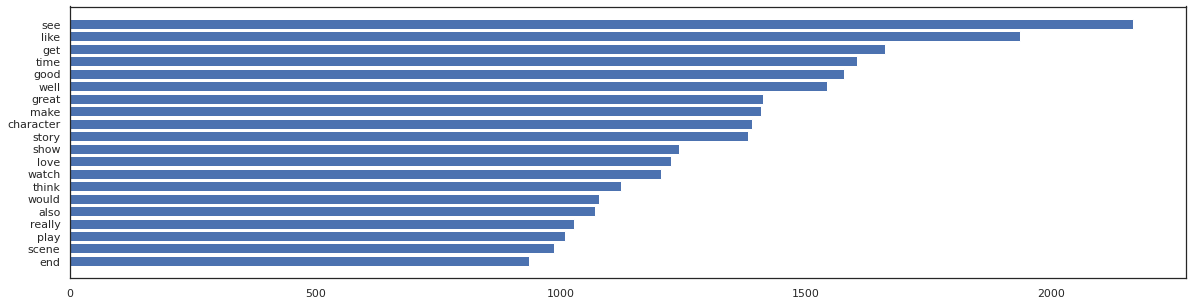

In [ ]:
##
## Plotting most frequent words from positive reviews using bar chart
##
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'white')
from nltk import FreqDist

# Subset positive review dataset
all_words_df = df.loc[df['sentiment'] == 'positive',:]

#Extracts words into list and count frequency
all_words = ' '.join([text for text in all_words_df['review_processed']])
all_words = all_words.split()
words_df = FreqDist(all_words)

# Extracting words and frequency from words_df object
words_df = pd.DataFrame({'word':list(words_df.keys()), 'count':list(words_df.values())})
words_df
# Subsets top 30 words by frequency
words_df = words_df.nlargest(columns="count", n = 20) 

words_df.sort_values('count', inplace = True)

# Plotting 30 frequent words
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

#### WordCloud

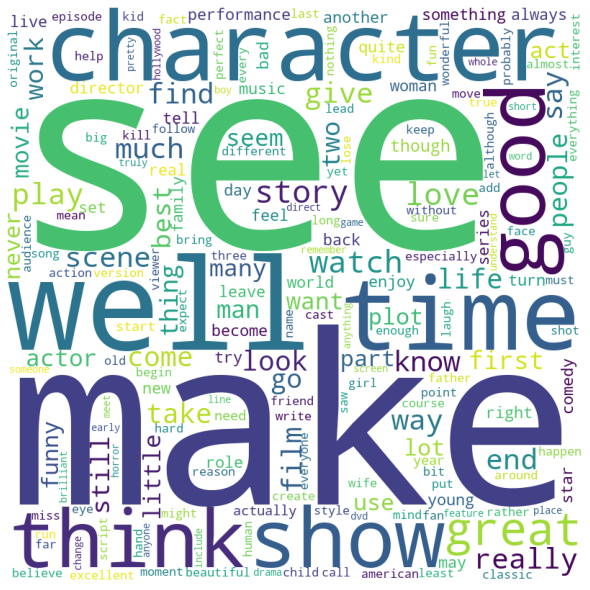

In [ ]:
##
## Bilding a Word Cloud
## 
from wordcloud import WordCloud
word_cloud_df = df.loc[df['sentiment'] == 'positive',:]
all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()

### Bag of Words Model

In [ ]:
# Importing module
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Creating sparse matrix of top 2500 tokens
cv = CountVectorizer(max_features = 2500)
tfidf = TfidfVectorizer(max_features=2500)
X = tfidf.fit_transform(df.review_processed).toarray()
y = df.sentiment.map({'positive' : 1, 'negative' : 0}).values
featureNames = tfidf.get_feature_names()
#Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.shape, X_test.shape

((4000, 2500), (1000, 2500))

## Building the ML model

In [ ]:
## Training the Naive Bayes model on the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

## Testing the model on test set
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[402 121]
 [ 99 378]]
The model accuracy is 0.78


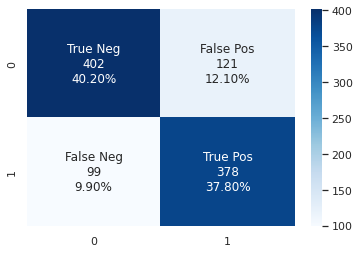

In [ ]:
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, classifier.predict_proba(X_test)[:, 1])

0.8161148991265518

## Feature Importance

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 15)
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)},columns = ['Word','Importance'])



In [ ]:
##featureImportance.sort_values(by='Importance')
featureImportance = pd.DataFrame({i : j for i,j in zip(dt.feature_importances_,featureNames)}.items(),columns = ['Importance','word'])
featureImportance.sort_values(by='Importance',ascending=False)

,Importance,word
12,0.222335,bad
118,0.077057,waste
50,0.050079,great
10,0.031187,awful
15,0.023590,bore
...,...,...
24,0.001395,villain
73,0.001339,suffer
3,0.001256,single
62,0.001116,show
